In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve
from scipy.stats import (mannwhitneyu, chisquare, fisher_exact)

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (confusion_matrix, precision_score, 
                                    recall_score, accuracy_score, r2_score, 
                                    plot_confusion_matrix)

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, plot_confusion_matrix
from sklearn.cluster import DBSCAN

# data preparation as feature engineering for wine dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# from sklearn.neighbors import KNeighborsRegressor

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import random

import json

In [3]:
df = pd.read_json('../../data/basic_dataset.json')

In [4]:
df['is_retweeted'] = np.where(1, df.retweets >= 1, 0)
df['is_favorited'] = np.where(1, df.favorites >= 1, 0)

In [10]:
def find_top_n(n, df , column = 'tweet_text', feature = '#'):
    ''' 
    Parameters
    ----------
    n: number of top features to view
    df: dataframe
    column: column of interest to loop through
    feature: what to look for in column like, # or @

    Returns
    -------
    top_tags: sorted words that are most common
    top_counts: sorted total counts in order of top tags
    '''    
    d = {}
    for text in df[column]:
        #avoid the tweets that are already retweets
        if text[:3] == 'RT ':
            pass
        elif feature in text:
            lst = text.split()
            ats = [at for at in lst if at[0] == feature]
            for tags in ats:
                tags = tags.replace(':', '')
                if tags not in d:
                    d[tags] = 1
                else:
                    d[tags] += 1
        else:
            pass

    tags = np.array(list(d.keys()))
    counts = np.array(list(d.values()))
    top_tags = tags[counts.argsort()[::-1]][:n]
    top_counts = counts[counts.argsort()[::-1]][:n]
    return top_tags, top_counts


In [11]:
top_hashtags, top_h_counts = find_top_n(n=10, df= df , column = 'tweet_text', feature = '#')

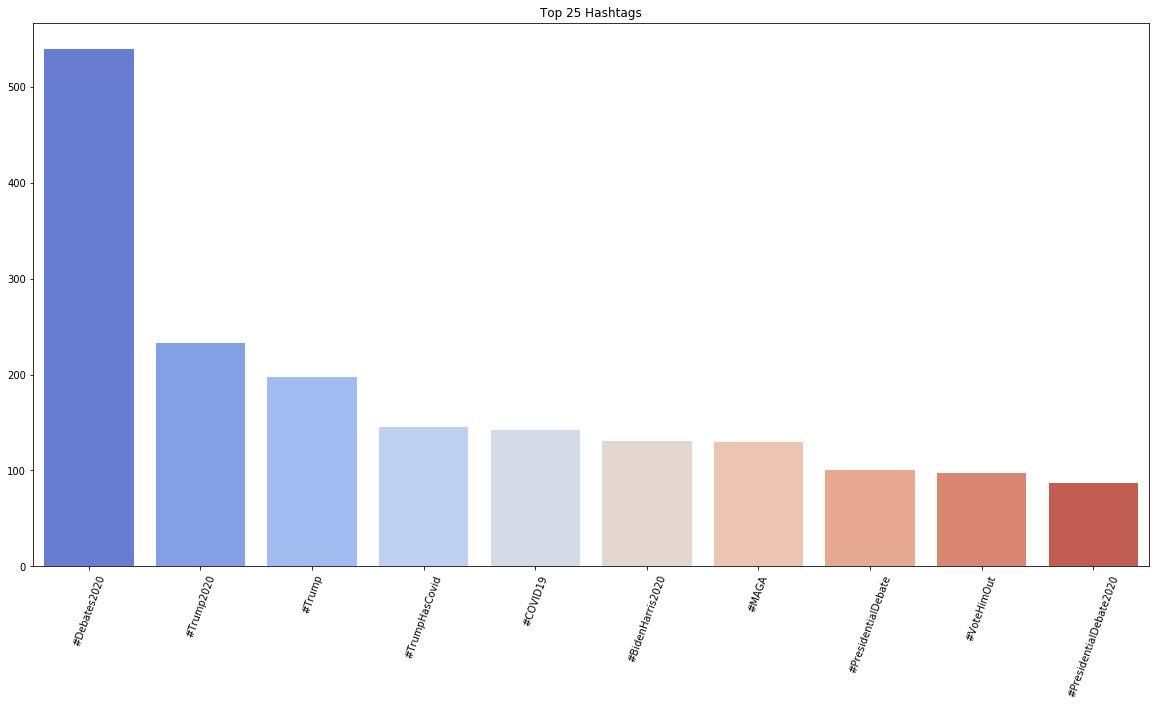

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(top_hashtags, top_h_counts, palette='coolwarm')
plt.xticks(rotation=70)
plt.title('Top 25 Hashtags')
plt.savefig('../images/top_ten_hashtags.png');

In [83]:

hashtagged = []
for i in top_10_tags:
    for text in non_rt_df.tweet_text:
        hashtagged.append((i in text)*1)
        
slices1 = np.linspace(len(non_rt_df.tweet_text), len(hashtagged), 10)

for i in range(len(top_10_tags)):
    if i == 0:
        non_rt_df[f'tags_{top_10_tags[i]}'] = hashtagged[:int(slices1[i])]
    else:
        non_rt_df[f'tags_{top_10_tags[i]}'] = hashtagged[int(slices1[i-1]):int(slices1[i])]


/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


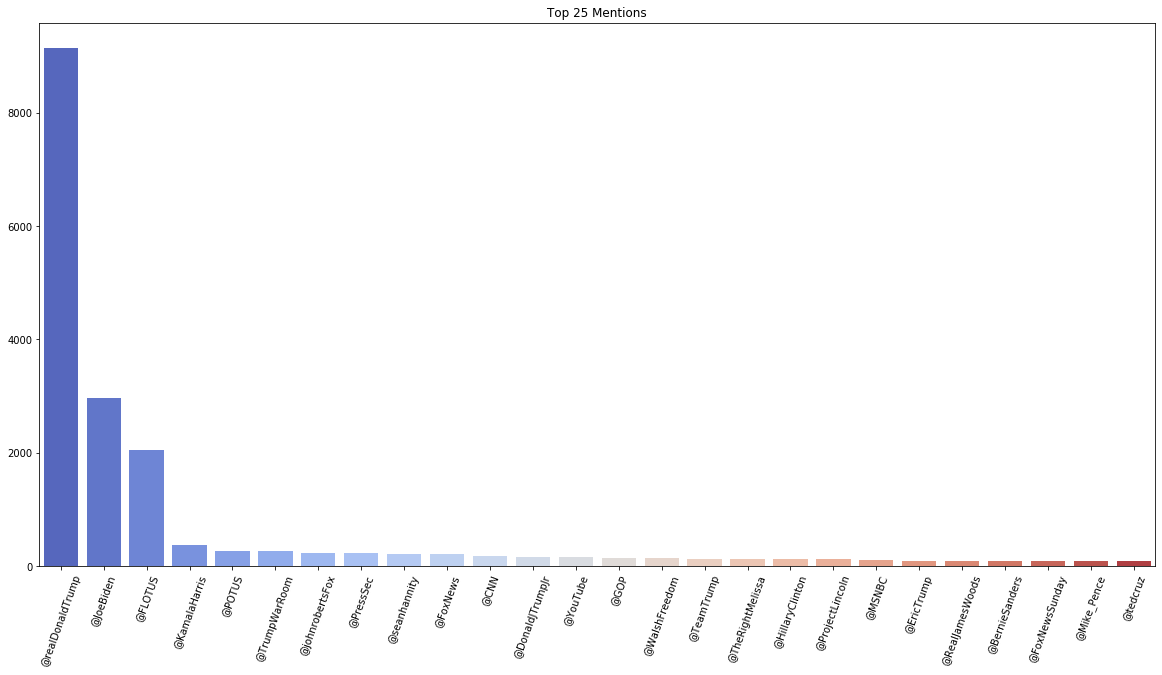

In [84]:
screen_names = {}
for text in df.tweet_text:
    if text[:3] == 'RT ':
        pass
    elif '@' in text:
        lst = text.split()
        ats = [at for at in lst if at[0] == '@']
        for names in ats:
            names = names.replace(':', '')
            if names not in screen_names:
                screen_names[names] = 1
            else:
                screen_names[names] += 1
    else:
        pass
    
names = np.array(list(screen_names.keys()))
count = np.array(list(screen_names.values()))
top_25_names = names[count.argsort()[::-1]][:26]
top_25_count = count[count.argsort()[::-1]][:26]
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(top_25_names, top_25_count, palette='coolwarm')
plt.xticks(rotation=70)
plt.title('Top 25 Mentions');

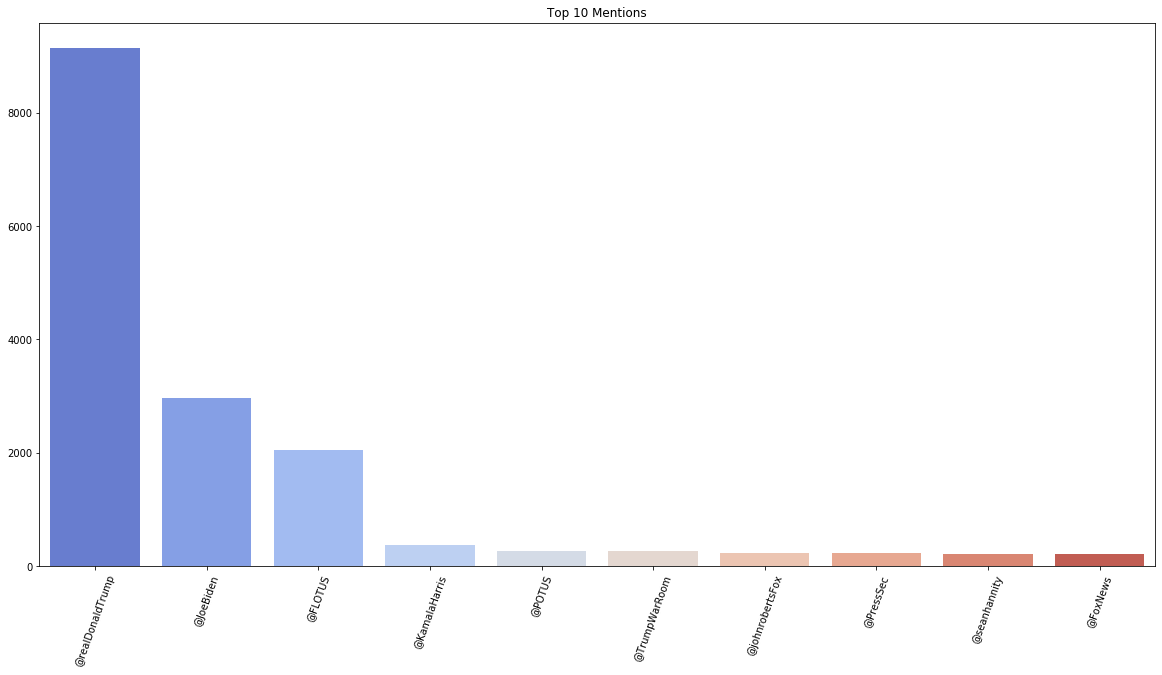

In [85]:
top_10_names = names[count.argsort()[::-1]][:10]
top_10_count = count[count.argsort()[::-1]][:10]
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(top_10_names, top_10_count, palette='coolwarm')
plt.xticks(rotation=70)
plt.title('Top 10 Mentions')
plt.savefig('../images/top_ten_mentions.png');

In [14]:
non_rt_df = df[df['is_retweet'] == 0]
def one_hot_encode_term(top_tags, n = 10, df = non_rt_df, column = 'tweet_text'):
    '''
    Parameters
    ----------
    top_tags: tags to one hot encode in dataframe
    n: how many you want to one hot encode
    df: dataframe
    column: column in df to loop through, checking if top tag is in the text

    Returns
    -------
    new dataframe with onehot encoded columns
    '''

    mentions = []
    for i in top_tags:
        for text in df[column]:
            mentions.append((i in text)*1)
            
    slices = np.linspace(len(df[column]), len(mentions), n)

    for i in range(len(top_tags)):
        if i == 0:
            df[f'mentions_{top_tags[i]}'] = mentions[:int(slices[i])]
        else:
            df[f'mentions_{top_tags[i]}'] = mentions[int(slices[i-1]):int(slices[i])]

    return df



In [ ]:
def one_hot_encode_term(top_hashtags, n = 10, df = df, column = 'tweet_text')

In [86]:
mentions = []
for i in top_10_names:
    for text in non_rt_df.tweet_text:
        mentions.append((i in text)*1)
        
slices = np.linspace(len(non_rt_df.tweet_text), len(mentions), 10)

for i in range(len(top_10_names)):
    if i == 0:
        non_rt_df[f'mentions_{top_10_names[i]}'] = mentions[:int(slices[i])]
    else:
        non_rt_df[f'mentions_{top_10_names[i]}'] = mentions[int(slices[i-1]):int(slices[i])]

/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [87]:
non_rt_df.columns

Index(['tweet_id', 'tweet_date', 'tweet_text', 'is_reply', 'is_quote',
       'is_retweet', 'sensitive', 'hashtags', 'mentions', 'u_verified',
       'u_egg', 'u_followers', 'u_created', 'retweets', 'favorites',
       'is_retweeted', 'is_favorited', 'tags_#Debates2020', 'tags_#Trump2020',
       'tags_#Trump', 'tags_#TrumpHasCovid', 'tags_#COVID19',
       'tags_#BidenHarris2020', 'tags_#MAGA', 'tags_#PresidentialDebate',
       'tags_#VoteHimOut', 'tags_#PresidentialDebate2020',
       'mentions_@realDonaldTrump', 'mentions_@JoeBiden', 'mentions_@FLOTUS',
       'mentions_@KamalaHarris', 'mentions_@POTUS', 'mentions_@TrumpWarRoom',
       'mentions_@johnrobertsFox', 'mentions_@PressSec',
       'mentions_@seanhannity', 'mentions_@FoxNews'],
      dtype='object')

## Basic EDA

In [88]:
df.head()

,tweet_id,tweet_date,tweet_text,is_reply,is_quote,is_retweet,sensitive,hashtags,mentions,u_verified,u_egg,u_followers,u_created,retweets,favorites,is_retweeted,is_favorited
0,1311093385688735744,Tue Sep 29 23:59:56 +0000 2020,Biden a professional debater?? Hardly!! More ...,0,1,0,0,[],[],0,0,4065,Sat Feb 27 00:36:23 +0000 2010,0,0,0,0
1,1311093394400333824,Tue Sep 29 23:59:58 +0000 2020,RT @DarDar458: #PresidentialDebate #Debates202...,0,1,1,0,"[{'text': 'PresidentialDebate', 'indices': [15...","[{'screen_name': 'DarDar458', 'name': 'DarDar4...",0,0,31031,Fri Apr 10 02:47:29 +0000 2009,1,0,1,0
2,1311093401652277252,Wed Sep 30 00:00:00 +0000 2020,How can Biden stand a chance against Trump in ...,0,0,0,0,"[{'text': 'VarneyCo', 'indices': [259, 268]}, ...","[{'screen_name': 'wjmcgurn', 'name': 'Bill McG...",1,0,663539,Wed Apr 13 16:27:54 +0000 2011,25,100,1,1
3,1311093410737070086,Wed Sep 30 00:00:02 +0000 2020,RT @abbydphillip: Very reminiscent of pre-2018...,0,1,1,0,[],"[{'screen_name': 'abbydphillip', 'name': 'Abby...",1,0,21737,Sat Nov 07 16:57:16 +0000 2009,351,0,1,0
4,1311093419100561408,Wed Sep 30 00:00:04 +0000 2020,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,0,0,1,0,[],"[{'screen_name': 'RudyGiuliani', 'name': 'Rudy...",0,0,893,Wed Jun 03 04:44:06 +0000 2009,15672,0,1,0


In [89]:
df.columns

Index(['tweet_id', 'tweet_date', 'tweet_text', 'is_reply', 'is_quote',
       'is_retweet', 'sensitive', 'hashtags', 'mentions', 'u_verified',
       'u_egg', 'u_followers', 'u_created', 'retweets', 'favorites',
       'is_retweeted', 'is_favorited'],
      dtype='object')

In [90]:
df['tweet_length'] = [len(x) for x in df['tweet_text']]

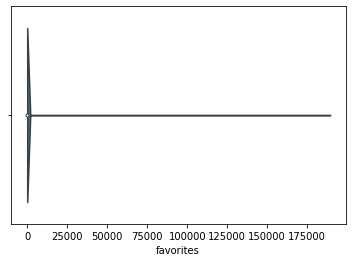

In [91]:
sns.violinplot(df[df.favorites != 1].favorites)

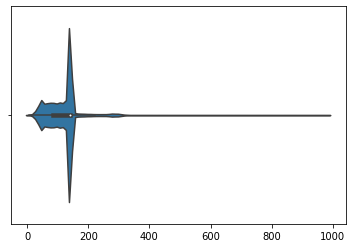

In [92]:
sns.violinplot(df.tweet_length.values)

In [93]:
plt.scatter((df[(df[df.favorites != 1])&(df[df.favorites < 43395].tweet_length), \
            (df[(df[df.favorites != 1])&(df[df.favorites < 43395].favorites))
plt.axvline(400)

SyntaxError: invalid syntax (<ipython-input-93-db47fe70d233>, line 2)

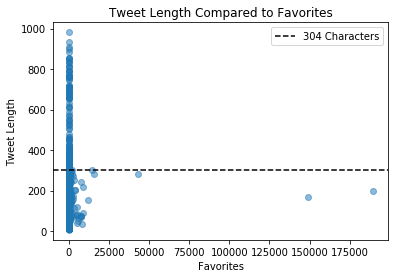

In [148]:
plt.scatter(df.favorites, df.tweet_length, alpha = 0.5)
# plt.axhline(119)
plt.axhline(304, c = 'k', ls = '--', label = '304 Characters')
plt.xlabel('Favorites')
plt.ylabel('Tweet Length')
plt.legend()
plt.title('Tweet Length Compared to Favorites')
plt.savefig('../images/Tweet_length_Favoritesnoout.png');

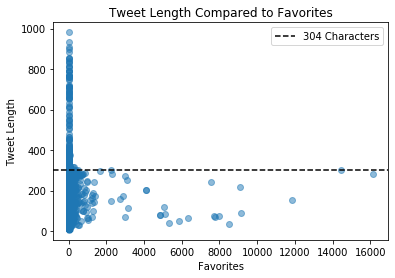

In [149]:
plt.scatter(df[df.favorites<30000].favorites, df[df.favorites<30000].tweet_length, alpha = 0.5)
# plt.axhline(119)
plt.axhline(304, c = 'k', ls = '--', label = '304 Characters')
plt.xlabel('Favorites')
plt.ylabel('Tweet Length')
plt.legend()
plt.title('Tweet Length Compared to Favorites')
plt.savefig('../images/Tweet_length_Favorites.png');

In [133]:
mannwhitneyu(df.tweet_length, df.favorites)

MannwhitneyuResult(statistic=36305405.0, pvalue=0.0)

In [ ]:
mannwhitneyu(df.tweet_length, df.favorites)

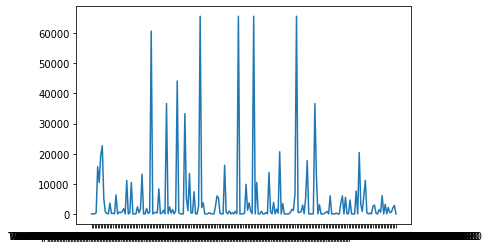

In [18]:
plt.plot(df.tweet_date[:200], df.retweets[:200])

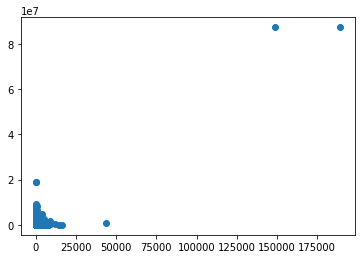

In [14]:
plt.scatter(df['favorites'], df['u_followers'])

## WORK WITH JUST THE FEATURES WE WANT TO PREDICT RETWEETS

In [23]:
encoded_df = non_rt_df[['tweet_text', 'retweets', 'is_retweeted', 'favorites', 'is_favorited', 'tags_#Debates2020', 'tags_#Trump2020', 'tags_#Trump',
       'tags_#TrumpHasCovid', 'tags_#COVID19', 'tags_#BidenHarris2020',
       'tags_#MAGA', 'tags_#PresidentialDebate', 'tags_#VoteHimOut',
       'tags_#PresidentialDebate2020', 'mentions_@realDonaldTrump',
       'mentions_@JoeBiden', 'mentions_@FLOTUS', 'mentions_@KamalaHarris',
       'mentions_@POTUS', 'mentions_@TrumpWarRoom', 'mentions_@johnrobertsFox',
       'mentions_@PressSec', 'mentions_@seanhannity', 'mentions_@FoxNews']]

In [24]:
def lemmatizer(string):
    # Lemmatize a string and return it in its original format
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(w)
                    for w in w_tokenizer.tokenize(string)
                    if "http" not in w])

encoded_df['tweet_text'] = encoded_df['tweet_text'].apply(lambda x: str(x).lower())
# encoded_df['tweet_text'] = encoded_df['tweet_text'].apply(lambda x: lemmatizer(x))

/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [128]:
tweets = []
for tweet in encoded_df.tweet_text:
    lst = tweet.split()
    for i in lst:
        final_tweet = []
        if i[0] == '@' or i[0] == '#':
            pass
        else:
            final_tweet.append(i)
    tweets.append(''.join(final_tweet))

In [129]:
encoded_df['tweet_text'] = tweets

/home/heather/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Vectorize the bitch

In [194]:
stop_words = list(STOPWORDS)
extra_stopwords = ['rt', '000', 'yes', 'el','la', '19', 'https', 're', 've', 'go', 'co', 'll', \
                   'realdonaldtrump flotus', 'trump', 'biden']
for word in extra_stopwords:
    stop_words.append(word)

In [195]:
stop_words

["we've",
 "they'd",
 'then',
 "we'll",
 'why',
 'those',
 'themselves',
 "he's",
 'their',
 'other',
 'not',
 'only',
 'he',
 'and',
 'having',
 'both',
 'from',
 'who',
 'here',
 'to',
 'once',
 'above',
 'these',
 'what',
 'have',
 'some',
 "i'd",
 'i',
 'also',
 "weren't",
 "wouldn't",
 'has',
 'myself',
 'against',
 "here's",
 'him',
 'itself',
 'down',
 'in',
 'if',
 'which',
 'whom',
 "aren't",
 "we'd",
 'me',
 'ought',
 'be',
 'on',
 'ours',
 "shouldn't",
 "hadn't",
 "he'll",
 'through',
 "they're",
 "that's",
 "they've",
 'therefore',
 'too',
 'was',
 "why's",
 "you'll",
 'where',
 "mustn't",
 'hence',
 'does',
 'between',
 'get',
 'www',
 'herself',
 'further',
 "let's",
 'such',
 "i'm",
 "they'll",
 "she'd",
 'hers',
 "shan't",
 'theirs',
 'than',
 'before',
 "what's",
 'all',
 'my',
 "wasn't",
 'could',
 "i've",
 'no',
 'few',
 'would',
 'but',
 'are',
 'again',
 "isn't",
 'do',
 'cannot',
 'them',
 'his',
 "where's",
 'is',
 'for',
 'like',
 'our',
 "can't",
 'yourself',
 

In [210]:
def orig_vect(X_train, custom_stopwords):
    '''
    pass in x training data to fit and transform to

    Returns:
     vectorizer, x_train vectorized
    '''
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features = 100, ngram_range=(1,2))
    x_train_vect = vectorizer.fit_transform(X_train)
    return vectorizer, x_train_vect

In [211]:
vectorizer, x_train_vect = orig_vect(encoded_df.tweet_text, stop_words)

/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'flotus', 'hadn', 'hasn', 'haven', 'isn', 'let', 'mustn', 'realdonaldtrump', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [212]:
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"]) 

In [213]:
df_idf.sort_values(by=['idf_weights'], ascending=False)

,idf_weights
ago,8.527076
positive,8.527076
supremacist,8.527076
leader,8.527076
harris,8.473009
...,...
2020,6.951540
covid,6.906589
debate,6.672516
lol,6.663858


In [214]:
#combine vecotized tweets with other onehot encoded columns into one matrix
vect_tweets = x_train_vect.todense()
other_cols = np.array(encoded_df.iloc[:, 5:-1])
X = np.concatenate((vect_tweets, other_cols), axis = 1)

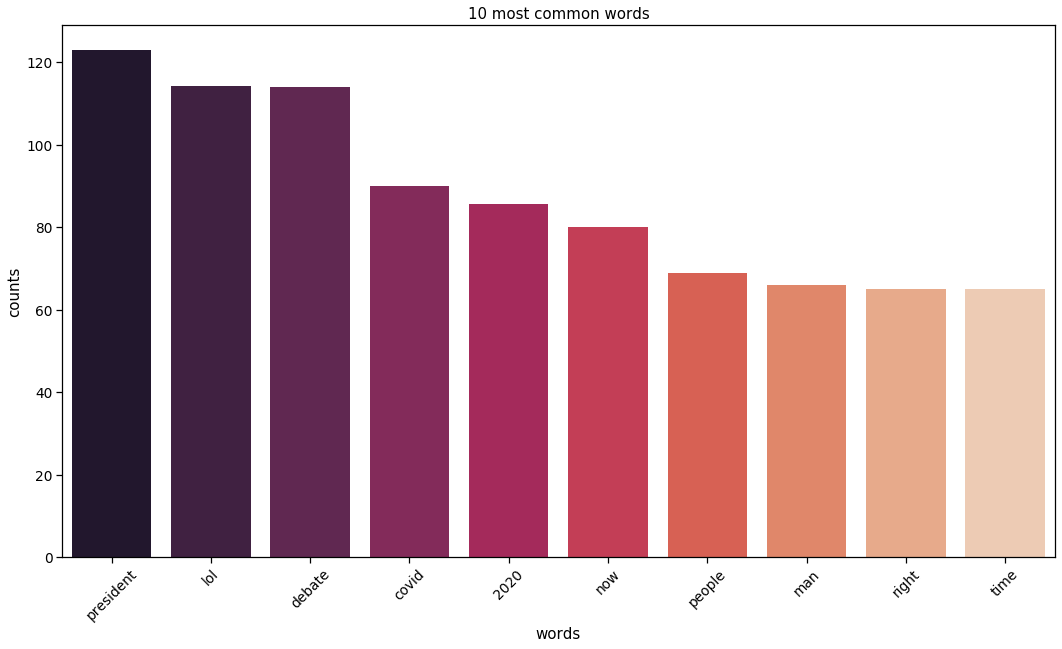

In [215]:
words = vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in x_train_vect:
    total_counts += t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:10]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='rocket')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../images/top_ten_words.png")

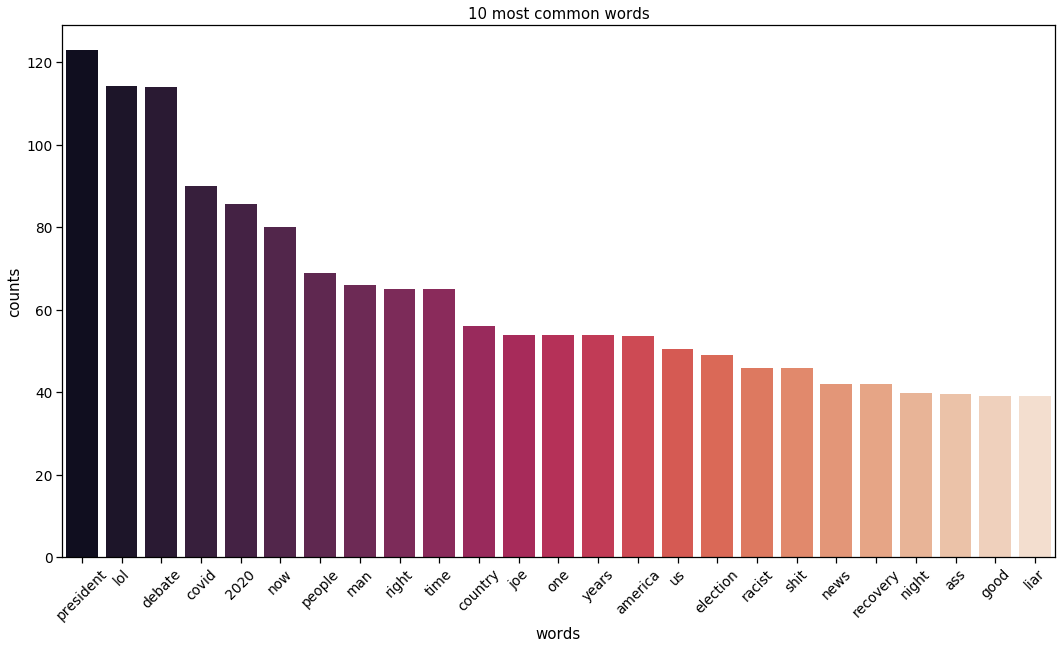

In [216]:



words = vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in x_train_vect:
    total_counts += t.toarray()[0]
count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:25]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
plt.figure(2, figsize=(15, 15/1.6180))
plt.subplot(title='10 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='rocket')
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../images/top_25.png")

## Classification

In [218]:
y = encoded_df['is_retweeted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25)


model = RandomForestClassifier(n_jobs=-1, max_depth=2, verbose = 1, class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


(0.4374526458507796, 0.4267942583732057)

In [183]:
# # transforms for the feature union
# transforms = list()
# transforms.append(('mms', MinMaxScaler()))
# transforms.append(('ss', StandardScaler()))
# transforms.append(('rs', RobustScaler()))
# transforms.append(('qt', QuantileTransformer(n_quantiles=100, output_distribution='normal')))
# transforms.append(('kbd', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')))
# transforms.append(('pca', PCA(n_components=7)))
# transforms.append(('svd', TruncatedSVD(n_components=7)))
# # create the feature union
# fu = FeatureUnion(transforms)

# # define the pipeline
# steps = list()
# steps.append(('fu', fu))
# steps.append(('m', model))
# pipeline = Pipeline(steps=steps)
# # define the cross-validation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [203]:
y = encoded_df['is_retweeted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25, stratify = y)


model = LogisticRegression(class_weight = 'balanced', verbose = 1, n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.2s finished


(0.4457869761135702, 0.4424641148325359)

In [179]:
y = encoded_df['is_favorited'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25, stratify = y)


model = LogisticRegression(class_weight = 'balanced', verbose = 1, n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished


(0.5172070024325078, 0.5236842105263158)

In [204]:
y = encoded_df['is_favorited'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.25, stratify = y)


model = RandomForestClassifier(n_jobs=-1, max_depth=3, verbose = 1, class_weight = 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.5155321609442916, 0.5242822966507177)

<BarContainer object of 2 artists>

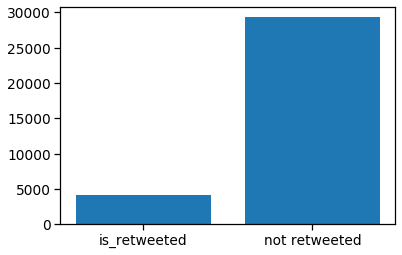

In [205]:
plt.bar(['is_retweeted', 'not retweeted'],[encoded_df['is_retweeted'].values.sum(), \
 len(encoded_df['is_retweeted'].values)-encoded_df['is_retweeted'].values.sum()])

In [736]:
total = len(encoded_df['is_retweeted'].values)
total_rt = encoded_df['is_retweeted'].values.sum()
total_not_rt = total-total_rt

In [737]:
total_rt/total, total_not_rt/total

(0.12282800490474624, 0.8771719950952538)

## Regression

In [803]:
y = encoded_df['favorites'].values
X_train, X_test, y_train, y_test = train_test_split(vect_tweets, y, random_state = 1, test_size = 0.25)


model = RandomForestRegressor(n_jobs=-1, max_depth=2, verbose = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


(0.679644088661969, -0.6748934777239106)

In [804]:
y = encoded_df['retweets'].values
X_train, X_test, y_train, y_test = train_test_split(vect_tweets, y, random_state = 1, test_size = 0.25)


model = RandomForestRegressor(n_jobs=-1, max_depth=2, verbose = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.6429178588301254, -0.2764482816520477)

In [794]:
y = encoded_df['retweets'].values
X_train, X_test, y_train, y_test = train_test_split(vect_tweets, y, random_state = 1, test_size = 0.25)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.05646891354677486, -2.8782667508677746)